### importa as bibliotecas e cria funções iniciais necessárias

In [1]:
#padrões
import pandas as pd
import numpy as np
import scipy

#dataviz
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#adicionais
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

#forecasting
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#ml
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import metrics

In [2]:
#cria uma função para plot os resultados do modelo
def plot_res(X_train, y_train, X_test, y_test, model):
    

    print('Train MAPE:', round(mape(y_train, model.predict(X_train)), 2), '%')
    print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    print('Test MAPE:', round(mape(y_test, model.predict(X_test)), 2), '%')
    print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title('Train set');
    plt.plot(y_train, y_train, 'b.', label='y');
    plt.plot(y_train, model.predict(X_train), 'r.', label='y_pred');
    plt.xlabel('y')
    plt.legend();


    plt.subplot(1,2,2)
    plt.title('Test set');
    plt.plot(y_test, y_test, 'b.', label='y');
    plt.plot(y_test, model.predict(X_test), 'r.', label='y_pred');
    plt.xlabel('y')
    plt.legend();

In [3]:
#cria uma função para calcular o MAPE
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### lê e configura arquivo de PLD


In [4]:
df = pd.read_csv('df.csv')

df.drop('Unnamed: 0', axis = 1, inplace = True)

df['Date'] = pd.to_datetime(df['Data'], format = "%Y/%m/%d")
df.drop('Data', axis = 1, inplace = True)

#troca a ordem das colunas para botar a data e o PLD no começo
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
df = df[cols]

### Define o shift temporal

In [5]:
t = 30 #número de períodos com shift em dias

n = t * 24

out = (len(df)) - n

#pega as t primeiras linhas da coluna de PLD

pld_s = df['PLD'].iloc[:out]

#exclui do df original os primeiros t valores

from datetime import datetime, timedelta

StartDate = "2020/01/01"

Date = datetime.strptime(StartDate, "%Y/%m/%d")

new_data = Date + timedelta(days=t)

df_shift = df[(df['Date'] >= new_data)]

#adiciona o vetor de plds atrasados em n dias

df_shift['pld_s'] = pld_s.values

### Configura o modelo

In [6]:
X = df_shift[['AMAZONAS_ear', 'CAPIVARI_ear', 'DOCE_ear',
       'GRANDE_ear', 'IGUACU_ear', 'JACUI_ear', 'JEQUITINHONHA_ear',
       'PARAGUACU_ear', 'PARAGUAI_ear', 'PARAIBA_ear', 'PARANA_ear',
       'PARANAIBA_ear', 'PARANAPANEMA_ear', 'PARNAIBA_ear', 'SFRANCISCO_ear',
       'TIETE_ear', 'TOCANTINS_ear', 'URUGUAI_ear', 'AMAZONAS_ena',
       'ARAGUARI_ena', 'CAPIVARI_ena', 'DOCE_ena', 'GRANDE_ena', 'IGUACU_ena',
       'ITABAPOANA_ena', 'ITAJAI_ena', 'JACUI_ena', 'JEQUITINHONHA_ena',
       'MUCURI_ena', 'PARAGUACU_ena', 'PARAGUAI_ena', 'PARAIBA_ena',
       'PARANA_ena', 'PARANAIBA_ena', 'PARANAPANEMA_ena', 'PARNAIBA_ena',
       'SFRANCISCO_ena', 'TIETE_ena', 'TOCANTINS_ena', 'URUGUAI_ena','PLD', 'Prec']]

y = df_shift['pld_s']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression

Train MAPE: 24.81 %
Train RMSE: 57.089929368454904
Test MAPE: 24.98 %
Test RMSE: 57.089929368454904


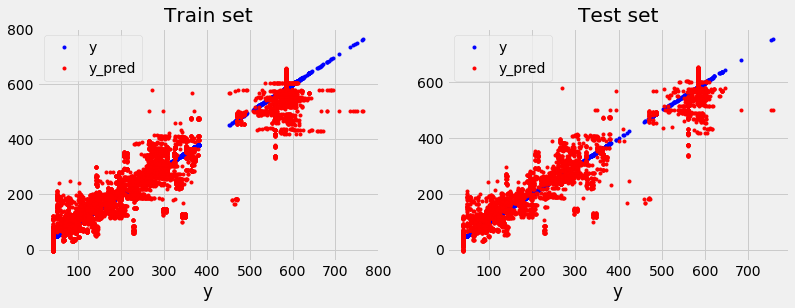

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)

plot_res(X_train, y_train, X_test, y_test, lm)

### Testa a regressão polinomial

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
print(poly.fit_transform([[2, 10]]))

poly = PolynomialFeatures(degree=3)
print(poly.fit_transform([[2, 10]]))

poly = PolynomialFeatures(degree=1, include_bias=False)
print(poly.fit_transform([[2, 10]]))

[[  1.   2.  10.   4.  20. 100.]]
[[   1.    2.   10.    4.   20.  100.    8.   40.  200. 1000.]]
[[ 2. 10.]]


In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.transform(X_test)

lm_exp = LinearRegression()
lm_exp.fit(X_train_transformed, y_train)

print('Train MAPE:', round(mape(y_train, lm_exp.predict(X_train_transformed)), 2), '%')
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train_transformed)))
print('Test MAPE:', round(mape(y_test, model.predict(X_test_transfo)), 2), '%')
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

Train MAPE: 6.49 %
